# Experiment 1

In [2]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df=pd.read_csv('avatar.csv',encoding='unicode_escape')
df_lines=df.groupby('character').count()
df_lines=df_lines.sort_values(by=['character_words'],ascending=False)[:10]
top_character_names=df_lines.index.values
df_main=df[df['character'].isin(top_character_names)]
df_main=df_main[['character','character_words']]
sia=SentimentIntensityAnalyzer()
df_main[['neg','neu','pos','compund']]=df_main['character_words'].apply(sia.polarity_scores).apply(pd.Series)
df_main

,character,character_words,neg,neu,pos,compund
0,Katara,Water. Earth. Fire. Air. My grandmother used t...,0.196,0.735,0.069,-0.9718
2,Sokka,It's not getting away from me this time. Watc...,0.000,1.000,0.000,0.0000
4,Katara,"Sokka, look!",0.000,1.000,0.000,0.0000
5,Sokka,"Sshh! Katara, you're going to scare it away. ...",0.200,0.800,0.000,-0.5411
7,Katara,"But, Sokka! I caught one!",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
13378,Zuko,At least you don't look like a boar-q-pine! My...,0.183,0.817,0.000,-0.4007
13380,Suki,And why did you paint me firebending?,0.000,1.000,0.000,0.0000
13381,Sokka,I thought it looked more exciting that way. O...,0.000,0.687,0.313,0.7501
13382,Iroh,"Hey, my belly's not that big anymore. I've rea...",0.000,1.000,0.000,0.0000


# Experiment 2

In [3]:
!pip install spacy
!pip install nltk
!python -m spacy download en_core_web_sm
import spacy
from spacy import displacy
NER = spacy.load('en_core_web_sm')
raw_text='The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well'
text1=NER(raw_text)
for word in text1.ents:
    print(word.text,word.label_)

The Indian Space Research Organisation ORG
India GPE
Bengaluru GPE
under Department of Space ORG
India GPE


# Experiment 3

In [4]:
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
text='Crying Cry Studies Study'
tokens=nltk.word_tokenize(text)
for w in tokens:
    print('The Stem word for {} is {}'.format(w,ps.stem(w)))

The Stem word for Crying is cri
The Stem word for Cry is cri
The Stem word for Studies is studi
The Stem word for Study is studi


In [5]:
import nltk
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()
text='Crying Cry Studies Study'
tokens=nltk.word_tokenize(text)
for w in tokens:
    print('The Lemmatized word for {} is {}'.format(w,wnl.lemmatize(w)))

The Lemmatized word for Crying is Crying
The Lemmatized word for Cry is Cry
The Lemmatized word for Studies is Studies
The Lemmatized word for Study is Study


# Experiment 4

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
text=['I love to code in Python. I love Python code',
     'I love to code in Java. I love Java code']
df=pd.DataFrame({'Review':['Review1','Review2'],'text':text})
cv= CountVectorizer(stop_words='english')
cv_matrix=cv.fit_transform(df['text'])
df_final=pd.DataFrame(cv_matrix.toarray(),
                     index=df['Review'].values,
                     columns=cv.get_feature_names())
df_final

,code,java,love,python
Review1,2,0,2,2
Review2,2,2,2,0


# Experiment 5

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
text=['I love to code in Python. I love Python code',
     'I love to code in Java. I love Java code']
df= pd.DataFrame({'Review':['Review1','Review'],'Text':text})
tfidfv = TfidfVectorizer(stop_words='english',norm=None)
tfidfv_matrix = tfidfv.fit_transform(df['Text'])
df_final = pd.DataFrame(tfidfv_matrix.toarray(),
                       index=df['Review'].values,
                       columns=tfidfv.get_feature_names())
df_final

,code,java,love,python
Review1,2.0,0.00000,2.0,2.81093
Review,2.0,2.81093,2.0,0.00000


# Experiment 6

In [8]:
import nltk
from nltk.corpus import stopwords
sw=stopwords.words('english')
print(sw)
print(len(sw))
text='When I first saw her she was very quiet. She remained quiet during the entire two hour journey from Stony Brook to New York.'
words=[word for word in text.split() if word not in sw]
new_line=' '.join(words)
print(new_line)
print('length before: '+str(len(text)))
print('length after: '+str(len(new_line)))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Experiment 7

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
sw=set(stopwords.words('english'))
text='Sukanya, Rajib and Naba are my good friends. '\
'Sukanya is getting married next year.'\
'Marriage is a big step in one’s life.'\
'It is both exciting and frightening.'\
'But friendship is a sacred bond between people.'\
'It is a special kind of love between us.'\
'Many of you must have tried searching for a friend '\
'but never found the right one.'
tokens = sent_tokenize(text)
for sent in tokens:
    words = [w for w in sent.split() if w not in sw]
    tagged=nltk.pos_tag(words)
    print(tagged)

[('Sukanya,', 'NNP'), ('Rajib', 'NNP'), ('Naba', 'NNP'), ('good', 'JJ'), ('friends.', 'NN')]
[('Sukanya', 'NNP'), ('getting', 'VBG'), ('married', 'VBD'), ('next', 'JJ'), ('year.Marriage', 'NN'), ('big', 'JJ'), ('step', 'NN'), ('one’s', 'RB'), ('life.It', 'VBZ'), ('exciting', 'VBG'), ('frightening.But', 'JJ'), ('friendship', 'NN'), ('sacred', 'VBD'), ('bond', 'NN'), ('people.It', 'NN'), ('special', 'JJ'), ('kind', 'NN'), ('love', 'NN'), ('us.Many', 'NN'), ('must', 'MD'), ('tried', 'VB'), ('searching', 'VBG'), ('friend', 'NN'), ('never', 'RB'), ('found', 'VBD'), ('right', 'JJ'), ('one.', 'NN')]


# Experiment 8

In [10]:
import nltk
sentence=[
    ('The','DT'),
    ('book','NN'),
    ('has','VBZ'),
    ('many','JJ'),
    ('chapters','NNS')
]
chunker=nltk.RegexpParser(r'''
NP:{<DT.*><NN.*><.*>*<NN.*>}
}<VBZ.*>{
'''
)

output=chunker.parse(sentence)
print(output)

(S (NP The/DT book/NN) has/VBZ (NP many/JJ chapters/NNS))


# Experiment 9

In [11]:
import nltk
from nltk.corpus import wordnet
synonyms=[]
antonyms=[]
for synset in wordnet.synsets('evil'):
    for l in synset.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
            
print(set(synonyms))
print(set(antonyms))

{'evil', 'iniquity', 'wickedness', 'malevolent', 'vicious', 'evilness', 'malefic', 'immorality', 'malign'}
{'goodness', 'good'}


# Experiment 10

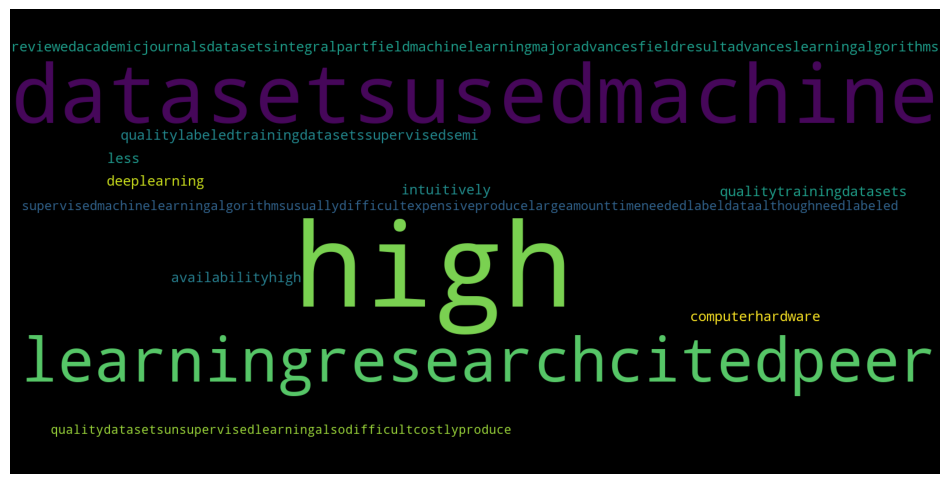

In [12]:
!pip install wordcloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
class WordCloudGenerator:
    def preprocessor(self,data):
        data=[item.lower() for item in data]
        para = ''.join(data)
        sw=set(stopwords.words('english'))
        tokens=word_tokenize(para)
        res = ''.join([word for word in tokens if word not in sw])
        return res
    def showCloud(self,data):
        wc=WordCloud(width=1600,height=800,max_font_size=200,background_color='black').generate(data)
        plt.figure(figsize=(12,10))
        plt.imshow(wc)
        plt.axis('off')
        plt.show()
        
wcg = WordCloudGenerator()
input_text='''These datasets are used for machine-learning research and have been cited in peer-
reviewed academic journals. Datasets are an integral part of the field of machine learning. Major
advances in this field can result from advances in learning algorithms (such as deep learning),
computer hardware, and, less-intuitively, the availability of high-quality training datasets.[1] High-
quality labeled training datasets for supervised and semi-supervised machine learning algorithms are
usually difficult and expensive to produce because of the large amount of time needed to label the
data. Although they do not need to be labeled, high-quality datasets for unsupervised learning can
also be difficult and costly to produce.'''
text=input_text.split('.')
prep=wcg.preprocessor(text)
wcg.showCloud(prep)